# AML-2203 Advanced Python AI and ML Tools Assignment
Submitted by: Suryansh Bali, Sanjana Bale, Pooja Patel, Neethu Ignacious

Hypothesis: University towns have their mean housing prices less effected by recessions.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

## Exploratory data analysis

In [2]:
data_frame=pd.read_csv('City_Zhvi_AllHomes.csv')

In [3]:
data_frame

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,398343,Urbana,NY,Corning,Steuben,10727,66900.0,65800.0,65500.0,65100.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,398496,New Denmark,WI,Green Bay,Brown,10728,NaN,NaN,NaN,NaN,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,398839,Angels,CA,NaN,Calaveras,10729,115600.0,116400.0,118000.0,119000.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [4]:
data_frame.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [5]:
data_frame.tail()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,398343,Urbana,NY,Corning,Steuben,10727,66900.0,65800.0,65500.0,65100.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,398496,New Denmark,WI,Green Bay,Brown,10728,NaN,NaN,NaN,NaN,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,398839,Angels,CA,NaN,Calaveras,10729,115600.0,116400.0,118000.0,119000.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900
10729,399114,Holland,WI,Sheboygan,Sheboygan,10730,129900.0,130200.0,130300.0,129100.0,...,217800,219400,221100,222000,222800,224900,228000,231200,233900,236000


In [6]:
data_frame.shape

(10730, 251)

In [7]:
data_frame.iloc[100:110]

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
100,41760,Winston-Salem,NC,Winston-Salem,Forsyth,101,84300.0,84700.0,84900.0,85400.0,...,114600,115000,115200,115700,116300,116400,116600,117300,117700,117700
101,52650,Irvine,CA,Los Angeles-Long Beach-Anaheim,Orange,102,241100.0,242000.0,243200.0,244700.0,...,752600,753500,756000,762000,766400,766800,767000,766600,765200,764200
102,6752,Richmond,VA,Richmond,Richmond City,103,66000.0,65900.0,65800.0,65800.0,...,157700,158400,157800,156600,155200,154300,154400,155000,156200,157500
103,10477,Boca Raton,FL,Miami-Fort Lauderdale,Palm Beach,104,132200.0,131900.0,131600.0,131400.0,...,294100,296300,297500,297900,298600,300200,302100,303700,304800,305700
104,13150,Oxnard,CA,Ventura,Ventura,105,159300.0,159600.0,159000.0,158400.0,...,426000,428800,430100,432200,434000,433800,432900,433400,435400,437500
105,44282,Bradenton,FL,North Port-Sarasota-Bradenton,Manatee,106,97900.0,97500.0,97200.0,96800.0,...,195600,197600,198400,199300,200500,201900,203800,205600,207300,208900
106,26967,Santa Rosa,CA,Santa Rosa,Sonoma,107,171600.0,171900.0,172200.0,172500.0,...,482300,485100,487400,489000,491400,494200,496300,498100,501700,505400
107,17759,Des Moines,IA,Des Moines,Polk,108,60600.0,61400.0,62300.0,63000.0,...,115600,115800,115800,116000,116300,116700,116900,117300,118200,119000
108,13478,Reno,NV,Reno,Washoe,109,147600.0,148200.0,148600.0,148700.0,...,271500,272900,274600,277600,281700,285500,288600,291700,296100,300500
109,20604,Spokane,WA,Spokane,Spokane,110,85400.0,85900.0,86000.0,85900.0,...,148900,149700,151000,152700,154900,156500,157500,158500,159700,160900


In [8]:
data_frame['CountyName'].value_counts()

Washington    192
Montgomery    157
Jefferson     150
Orange        123
Allegheny     113
             ... 
Aransas         1
Dickey          1
Camp            1
Eastland        1
Fillmore        1
Name: CountyName, Length: 851, dtype: int64

In [9]:
data_frame.groupby('RegionName').mean()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
RegionName,,,,,,,,,,,,,,,,,,,,,
Abbeville,30113.0,9160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103800.0,103100.0,103600.0,103800.0,104500.0,105300.0,105200.0,105200.0,106100.0,106900.0
Aberdeen,30244.0,3225.0,77150.0,77450.0,77550.0,77450.0,77700.0,78400.0,78900.0,78950.0,...,135950.0,136350.0,136150.0,136200.0,136700.0,138200.0,140000.0,140600.0,139800.0,139650.0
Abernathy,50636.0,6841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66900.0,67000.0,67100.0,67500.0,67700.0,67400.0,67000.0,66800.0,66100.0,65400.0
Abingdon,43815.0,1468.0,123900.0,124400.0,124500.0,124600.0,124800.0,125200.0,125600.0,125700.0,...,235300.0,236800.0,237200.0,237000.0,237200.0,237000.0,237300.0,237900.0,238700.0,239500.0
Abington,29110.5,2617.5,128050.0,127900.0,128050.0,128450.0,128550.0,128350.0,128400.0,128900.0,...,275400.0,275800.0,276000.0,277250.0,278500.0,278500.0,278600.0,279350.0,281200.0,283150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimmerman,41824.0,8602.0,86100.0,88300.0,89400.0,90200.0,90600.0,90600.0,90600.0,90400.0,...,156500.0,157500.0,158400.0,159900.0,162400.0,165200.0,167200.0,167700.0,166800.0,166000.0
Zion,129626.5,4751.5,99650.0,99150.0,99250.0,100000.0,100950.0,101600.0,102000.0,102200.0,...,153900.0,154150.0,154150.0,154300.0,154650.0,155250.0,156750.0,158100.0,158500.0,158500.0
Zionsville,28072.0,3943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,341200.0,341900.0,341800.0,336600.0,331300.0,330300.0,332600.0,334000.0,336000.0,338700.0


In [10]:
def uppercase(x):
    return x.upper()
data_frame['RegionName'].apply(uppercase)[0:50]

0             NEW YORK
1          LOS ANGELES
2              CHICAGO
3         PHILADELPHIA
4              PHOENIX
5            LAS VEGAS
6            SAN DIEGO
7               DALLAS
8             SAN JOSE
9         JACKSONVILLE
10       SAN FRANCISCO
11              AUSTIN
12             DETROIT
13            COLUMBUS
14             MEMPHIS
15           CHARLOTTE
16             EL PASO
17              BOSTON
18             SEATTLE
19           BALTIMORE
20              DENVER
21          WASHINGTON
22           NASHVILLE
23           MILWAUKEE
24              TUCSON
25            PORTLAND
26       OKLAHOMA CITY
27               OMAHA
28         ALBUQUERQUE
29              FRESNO
30          SACRAMENTO
31                MESA
32          LONG BEACH
33         KANSAS CITY
34      VIRGINIA BEACH
35    COLORADO SPRINGS
36             ATLANTA
37               MIAMI
38             OAKLAND
39               TULSA
40           CLEVELAND
41            HONOLULU
42         MINNEAPOLIS
43         

In [11]:
data_frame.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
count,10730.000000,10730.000000,8.083000e+03,8.179000e+03,8.218000e+03,8.221000e+03,8.229000e+03,8.229000e+03,8.229000e+03,8.235000e+03,...,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04,1.073000e+04
mean,87338.218080,5365.500000,1.203738e+05,1.204542e+05,1.203388e+05,1.204008e+05,1.204700e+05,1.205682e+05,1.207127e+05,1.210040e+05,...,2.363926e+05,2.372042e+05,2.378533e+05,2.386053e+05,2.395900e+05,2.405300e+05,2.413038e+05,2.419801e+05,2.428608e+05,2.436931e+05
std,128121.389608,3097.628528,7.835705e+04,7.790580e+04,7.785422e+04,7.795274e+04,7.795952e+04,7.802532e+04,7.816369e+04,7.835491e+04,...,2.423569e+05,2.432497e+05,2.441329e+05,2.451509e+05,2.461725e+05,2.467904e+05,2.471556e+05,2.473850e+05,2.477199e+05,2.479585e+05
min,3304.000000,1.000000,2.400000e+04,2.430000e+04,2.420000e+04,2.370000e+04,2.350000e+04,2.340000e+04,2.380000e+04,2.430000e+04,...,3.090000e+04,3.050000e+04,3.020000e+04,3.040000e+04,3.100000e+04,3.160000e+04,3.200000e+04,3.230000e+04,3.300000e+04,3.360000e+04
25%,19606.250000,2683.250000,7.520000e+04,7.570000e+04,7.560000e+04,7.560000e+04,7.580000e+04,7.580000e+04,7.570000e+04,7.590000e+04,...,1.213000e+05,1.218000e+05,1.219000e+05,1.221250e+05,1.224000e+05,1.228000e+05,1.232000e+05,1.235000e+05,1.239250e+05,1.244000e+05
50%,35970.000000,5365.500000,1.037000e+05,1.041000e+05,1.038000e+05,1.040000e+05,1.042000e+05,1.046000e+05,1.047000e+05,1.048000e+05,...,1.727000e+05,1.733000e+05,1.735000e+05,1.742000e+05,1.750500e+05,1.757500e+05,1.762000e+05,1.766000e+05,1.774000e+05,1.781000e+05
75%,53160.250000,8047.750000,1.420000e+05,1.421000e+05,1.418750e+05,1.420000e+05,1.419000e+05,1.419000e+05,1.421000e+05,1.423500e+05,...,2.669750e+05,2.679000e+05,2.688000e+05,2.699750e+05,2.708750e+05,2.724000e+05,2.734000e+05,2.738000e+05,2.750750e+05,2.762750e+05
max,737791.000000,10730.000000,2.574500e+06,2.553100e+06,2.541500e+06,2.531700e+06,2.526600e+06,2.530400e+06,2.535100e+06,2.543800e+06,...,6.054000e+06,6.081000e+06,6.128400e+06,6.182400e+06,6.230600e+06,6.263700e+06,6.266700e+06,6.235800e+06,6.213000e+06,6.200200e+06


## Data Cleaning

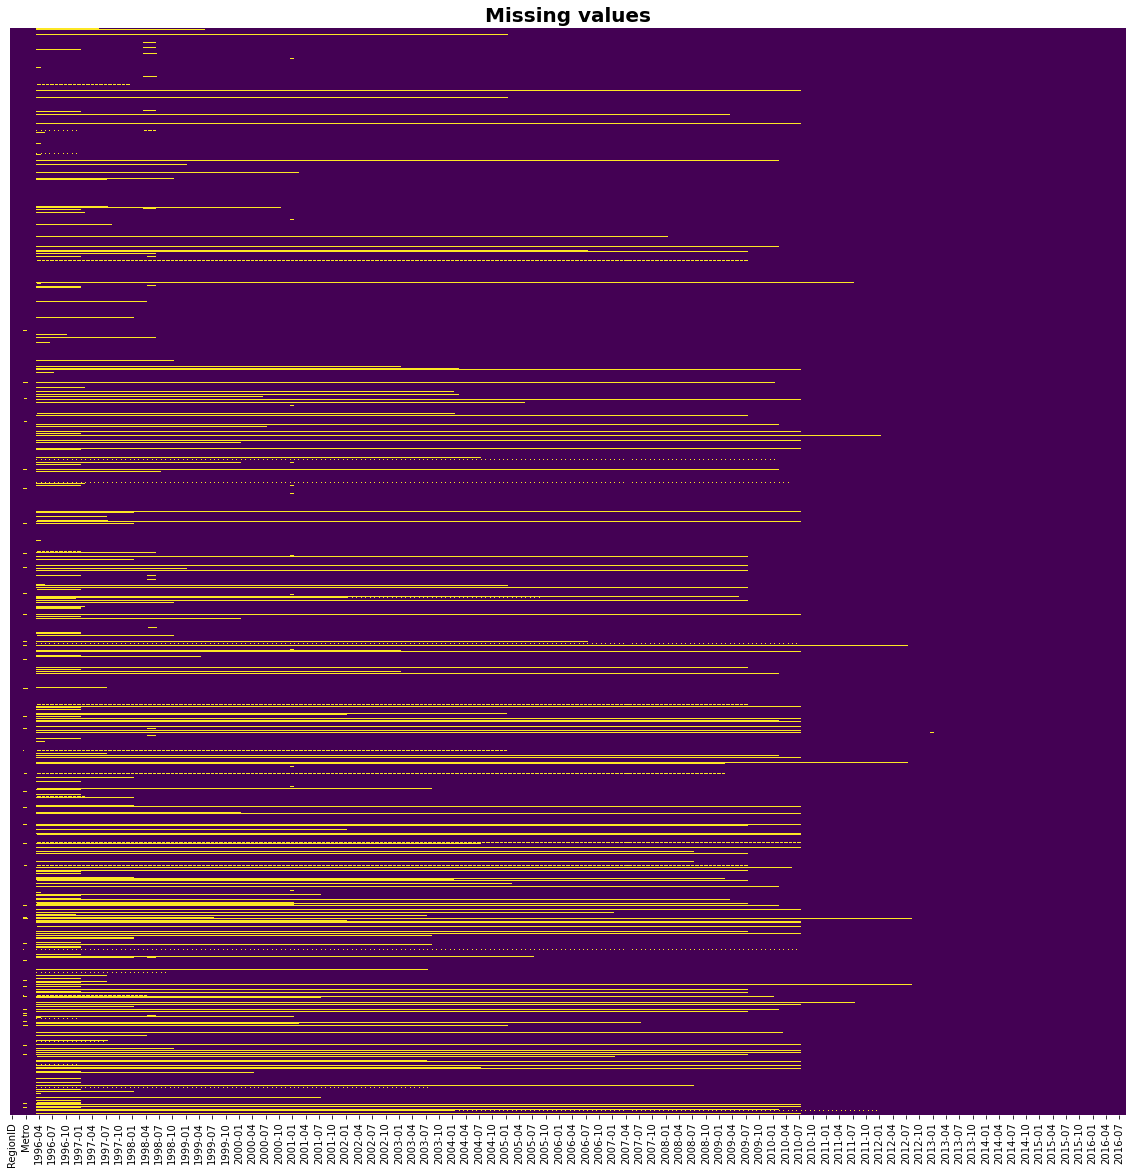

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.show()

In [13]:
data_frame.isnull().sum(axis=0).sort_values(ascending=False)

1996-04     2647
1996-05     2551
1996-06     2512
1996-07     2509
1996-10     2501
            ... 
2014-04        0
2014-05        0
2014-06        0
2014-07        0
RegionID       0
Length: 251, dtype: int64

In [14]:
data_frame.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Columns: 251 entries, RegionID to 2016-08
dtypes: float64(201), int64(46), object(4)
memory usage: 20.5+ MB


In [15]:
null_data = data_frame[data_frame.isnull().any(axis=1)]

In [16]:
null_data

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
11,10221,Austin,TX,Austin,Travis,12,NaN,NaN,NaN,NaN,...,287300,289300,291100,293400,296000,299200,301800,303300,304100,304800
12,17762,Detroit,MI,Detroit,Wayne,13,NaN,NaN,NaN,NaN,...,38500,38400,38300,38000,37600,37400,37500,37500,37700,38100
21,41568,Washington,DC,Washington,District of Columbia,22,NaN,NaN,NaN,NaN,...,501200,502500,503800,504700,503800,503400,505100,508900,513900,518600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,56943,Marysville,IN,Louisville/Jefferson County,Clark,10720,NaN,NaN,NaN,NaN,...,119800,124100,127200,129500,128000,124800,122700,122200,123100,125300
10724,227014,Gruetli Laager,TN,NaN,Grundy,10725,24800.0,24300.0,24500.0,25000.0,...,71800,72900,74500,75700,75800,75900,76600,76900,77200,77800
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10727,398496,New Denmark,WI,Green Bay,Brown,10728,NaN,NaN,NaN,NaN,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900


In [17]:
data_frame.dtypes

RegionID       int64
RegionName    object
State         object
Metro         object
CountyName    object
               ...  
2016-04        int64
2016-05        int64
2016-06        int64
2016-07        int64
2016-08        int64
Length: 251, dtype: object

In [18]:
data_frame = data_frame.fillna(data_frame.mean(axis=0))

In [19]:
def impute_metro(cols):
    Metro = cols[0]
    RegionName = cols[1]
    
    if pd.isnull(Metro):
        return RegionName
    else:
        return Metro
data_frame['Metro'] = data_frame[['Metro','RegionName']].apply(impute_metro,axis=1)

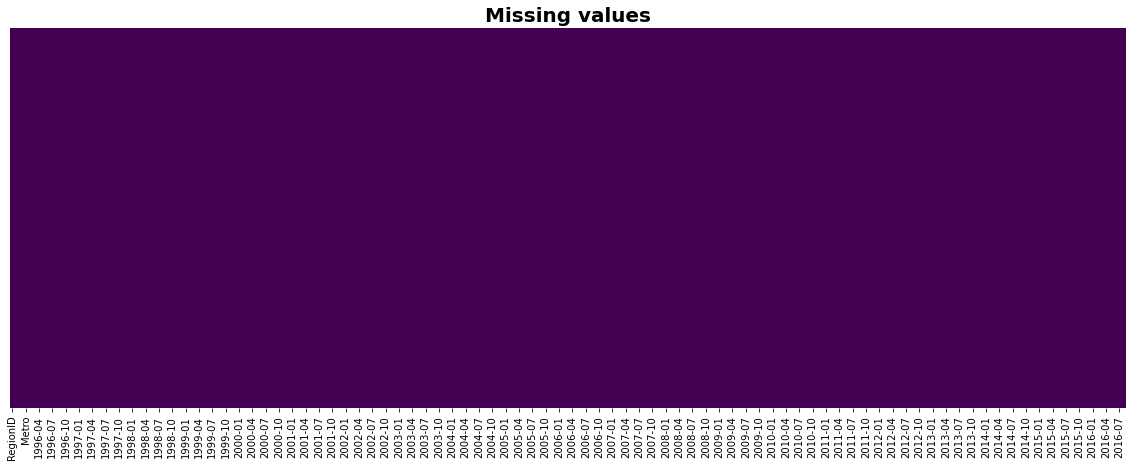

In [37]:
plt.figure(figsize=(20, 7))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.show()

## Creating the GDP data

In [21]:
gdp_data = pd.ExcelFile('gdplev.xls')
data = gdp_data.parse(skiprows=7)
data = data[['Unnamed: 4', 'Unnamed: 5']]
data = data.loc[212:]
data.columns = ['Quarter','GDP']
data['GDP'] = pd.to_numeric(data['GDP'])
data

,Quarter,GDP
212,2000q1,10031.0
213,2000q2,10278.3
214,2000q3,10357.4
215,2000q4,10472.3
216,2001q1,10508.1
...,...,...
273,2015q2,17998.3
274,2015q3,18141.9
275,2015q4,18222.8
276,2016q1,18281.6


## Recession start period

In [22]:
def recession_start_period():
    gdp_data = pd.ExcelFile('gdplev.xls')
    data = gdp_data.parse(skiprows=7)
    data = data[['Unnamed: 4', 'Unnamed: 5']]
    data = data.loc[212:]
    data.columns = ['Quarter','GDP']
    data['GDP'] = pd.to_numeric(data['GDP'])
    start = []
    for i in range(len(data) - 2):
        if (data.iloc[i][1] > data.iloc[i+1][1]) & (data.iloc[i+1][1] > data.iloc[i+2][1]):
            start.append(data.iloc[i][0])
    return start[0]

recession_start_period()

'2008q3'

## Recession end period

In [23]:
def recession_end(value, start):
    value = value[value['Quarter'] >= start].copy()
    end = value[(value['GDP'] > value['GDP'].shift(1))&(value['GDP'].shift(1) > value['GDP'].shift(2))].copy()
    return end.iloc[0,0]
recession_end_period = recession_end(data,'2008q3')
recession_end_period

'2009q4'

## Recession bottom

In [24]:
def recession_bottom_period():
    gdp_data1 = pd.read_excel('gdplev.xls', skiprows = 7)
    gdp_data1 = gdp_data1[['Unnamed: 4','Unnamed: 6']]
    gdp_data1.columns = ['Quarter','GDP']
    gdp_data1 = gdp_data1.iloc[212:]
    gdp_data1 = gdp_data1.reset_index()
    gdp_data1 = gdp_data1[['Quarter','GDP']]
    
    end = []
    for i in range(len(gdp_data1) - 4):
        if ((gdp_data1.iloc[i][1] > gdp_data1.iloc[i+1][1]) & (gdp_data1.iloc[i+1][1] > gdp_data1.iloc[i+2][1]) 
            & (gdp_data1.iloc[i+2][1] < gdp_data1.iloc[i+3][1]) & (gdp_data1.iloc[i+3][1] < gdp_data1.iloc[i+4][1])):
            
            end.append([gdp_data1.iloc[i][0],gdp_data1.iloc[i+1][0],gdp_data1.iloc[i+2][0],gdp_data1.iloc[i+3][0],
                        gdp_data1.iloc[i+4][0]])

    result = end[0][2]
    return result
    
recession_bottom_period()

'2009q2'

## List of university towns

In [25]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 
          'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 
          'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 
          'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 
          'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 
          'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana',
          'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma','FL': 'Florida', 'CA': 'California', 
          'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 
          'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 
          'ND': 'North Dakota', 'VA': 'Virginia'}

In [26]:
month_to_qtr = {'01':'q1','02':'q1','03':'q1','04':'q2','05':'q2','06':'q2',
                '07':'q3','08':'q3','09':'q3','10':'q4','11':'q4','12':'q4'}

In [27]:
def university_towns():
   
    with open('university_towns.txt') as file:
        mylist = []
        for x in file:
            mylist.append(x[:-1])         
    st = []
    for x in mylist:
        if x[-6:] == '[edit]':
            s = x[:-6]
        elif '(' in x:
            t = x[:x.index('(')-1]
            st.append([s,t])
        
        else:
            t = x
            st.append([s,t])
    df_state = pd.DataFrame(st,columns = ['State','RegionName'])
    return df_state
university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


## Conversion of housing data

In [28]:
def housing_data_to_quarters():
       
    housing_df = pd.read_csv('City_Zhvi_AllHomes.csv')
    housing_df = housing_df.drop(housing_df.columns[[0] + list(range(3,51))], axis=1)
    df = pd.DataFrame(housing_df[['State', 'RegionName']])

    for year in range(2000, 2016):
        df[str(year) + 'q1'] = housing_df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
        df[str(year) + 'q2'] = housing_df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
        df[str(year) + 'q3'] = housing_df[[str(year) + '-07', str(year) + '-08', str(year) + '-09']].mean(axis = 1)
        df[str(year) + 'q4'] = housing_df[[str(year) + '-10', str(year) + '-11', str(year) + '-12']].mean(axis = 1)
    year = 2016
    df[str(year) + 'q1'] = housing_df[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
    df[str(year) + 'q2'] = housing_df[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
    df[str(year) + 'q3'] = housing_df[[str(year) + '-07', str(year) + '-08']].mean(axis = 1)

    df['State'] = [states[state] for state in df['State']]
    df = df.set_index(['State', 'RegionName'])
    result_data = pd.DataFrame(df)
    
    return result_data

housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0


In [29]:
unitowns = university_towns()
bottom_period = recession_bottom_period()
start_period = recession_start_period()
housingdata = housing_data_to_quarters()
bottomstart = housingdata.columns[housingdata.columns.get_loc(start_period) - 1]

## Running t-test

In [30]:
housingdata['Ratio'] =  (housingdata[bottomstart] - housingdata[bottom_period])/ housingdata[start_period]
housingdata['Ratio']

State         RegionName         
New York      New York               0.076236
California    Los Angeles            0.188214
Illinois      Chicago                0.078448
Pennsylvania  Philadelphia           0.016819
Arizona       Phoenix                0.191123
                                       ...   
Wisconsin     Town of Wrightstown    0.034306
New York      Urbana                -0.063896
Wisconsin     New Denmark           -0.030579
California    Angels                 0.152247
Wisconsin     Holland                0.119982
Name: Ratio, Length: 10730, dtype: float64

In [31]:
housingdata = housingdata[[bottom_period, bottomstart, 'Ratio']]
housingdata = housingdata.reset_index()
unitowns_housingdata = pd.merge(housingdata,unitowns,how='inner',on=['State','RegionName'])
unitowns_housingdata.head()

,State,RegionName,2009q2,2008q2,Ratio
0,Nevada,Las Vegas,164333.333333,232300.000000,0.318544
1,California,San Diego,389500.000000,441400.000000,0.122214
2,Texas,Dallas,105100.000000,115366.666667,0.091530
3,Texas,Austin,204000.000000,213733.333333,0.046122
4,Ohio,Columbus,109766.666667,113500.000000,0.033274


In [32]:
unitowns_housingdata['University'] = True
data = pd.merge(housingdata, unitowns_housingdata, how='outer', on=['State','RegionName',bottom_period, bottomstart,
                                                                      'Ratio'])
data['University'] = data['University'].fillna(False)
university = data[data['University'] == True]
not_university = data[data['University'] == False]

In [33]:
university

,State,RegionName,2009q2,2008q2,Ratio,University
5,Nevada,Las Vegas,164333.333333,232300.000000,0.318544,True
6,California,San Diego,389500.000000,441400.000000,0.122214,True
7,Texas,Dallas,105100.000000,115366.666667,0.091530,True
11,Texas,Austin,204000.000000,213733.333333,0.046122,True
13,Ohio,Columbus,109766.666667,113500.000000,0.033274,True
...,...,...,...,...,...,...
9655,Michigan,Berrien Springs,105733.333333,114833.333333,0.079499,True
9851,Indiana,Oakland City,50866.666667,61666.666667,0.195770,True
9898,Ohio,Oberlin,125100.000000,131133.333333,0.047719,True
10207,Texas,Keene,95900.000000,97600.000000,0.017189,True


In [34]:
not_university

,State,RegionName,2009q2,2008q2,Ratio,University
0,New York,New York,465833.333333,503933.333333,0.076236,False
1,California,Los Angeles,413900.000000,502266.666667,0.188214,False
2,Illinois,Chicago,219700.000000,237900.000000,0.078448,False
3,Pennsylvania,Philadelphia,116166.666667,118133.333333,0.016819,False
4,Arizona,Phoenix,168233.333333,205266.666667,0.191123,False
...,...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,144833.333333,149966.666667,0.034306,False
10726,New York,Urbana,123433.333333,115900.000000,-0.063896,False
10727,Wisconsin,New Denmark,178833.333333,173466.666667,-0.030579,False
10728,California,Angels,282866.666667,328033.333333,0.152247,False


In [36]:
def ttest():
    from scipy.stats import ttest_ind
    ttest,pval = ttest_ind(university['Ratio'].dropna(), not_university['Ratio'].dropna())
    if pval < 0.01:
        val = True
    else:
        val = False
    
    if university['Ratio'].mean() < not_university['Ratio'].mean():
        finer = "university town"
    else:
        finer = "non-university town"
    
    return (pval, val, finer)
ttest()

(0.0032232285973104106, True, 'university town')

## Conclusion

The p value is 0.0032 which is less than 0.1, concludes that the mean housing prices of University Towns 
were less affected by the recession